In [21]:
import sys, os
import pandas as pd
import numpy as np
import warnings

import cv2
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2

In [22]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


angry 4953
disgust 547
fear 5120
happy 8988
sad 6077
surprise 4002
neural 6198


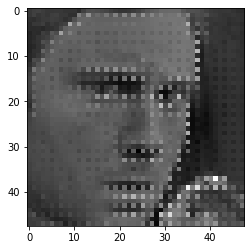

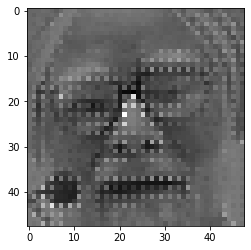

In [23]:
num_features = 64
num_labels = 7
batch_size = 128
epochs = 1
width, height = 48, 48

x = np.load('/content/drive/My Drive/face_recognisation/imgf+hogf.npy')
y = np.load('/content/drive/My Drive/face_recognisation/flabels.npy')

x -= np.mean(x, axis=0)
x /= np.std(x, axis=0)
 
a = 0
b = 0
c = 0
d = 0
e = 0
f = 0
g = 0
for i in range(35885):
  if y[i][0] == 1:
    a += 1
  if y[i][1] == 1:
    b += 1
  if y[i][2]== 1:
    c += 1
  if y[i][3] == 1:
    d  += 1
  if y[i][4] == 1:
    e += 1
  if y[i][5] == 1:
    f += 1
  if y[i][6] == 1:
    g += 1

print("angry",a)
print("disgust",b)
print("fear",c)
print("happy",d)
print("sad",e)
print("surprise",f)
print("neural",g)
for xx in range(2):
    plt.figure(xx)
    plt.imshow(x[xx].reshape((48, 48)), interpolation='none',cmap='gray')
    plt.show()



In [24]:

#splitting into training, validation and testing data
X_train, dtest, y_train, dytest = train_test_split(x, y, test_size=3/14, random_state=1,stratify = y)
X_test, X_valid, y_test, y_valid = train_test_split(dtest, dytest, test_size=1/2, random_state=1,stratify = dytest)
# X_train = X_train[0:,:]
# y_train = y_train[0:2000,:]
# X_test = X_test[0:200,:]
# y_test = y_test[0:200,:]
# X_valid = X_valid[0:200,:]
# y_valid = y_valid[0:200,:]

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)
print(y_train)
print(y_test.shape)
print(y_valid.shape)



(28196, 48, 48, 1)
(3845, 48, 48, 1)
(3846, 48, 48, 1)
[[0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 1 0]]
(3845, 7)
(3846, 7)


In [25]:
a = 0
b = 0
c = 0
d = 0
e = 0
f = 0
g = 0
for i in range(3845):
  if y_test[i][0] == 1:
    a += 1
  if y_test[i][1] == 1:
    b += 1
  if y_test[i][2]== 1:
    c += 1
  if y_test[i][3] == 1:
    d  += 1
  if y_test[i][4] == 1:
    e += 1
  if y_test[i][5] == 1:
    f += 1
  if y_test[i][6] == 1:
    g += 1

print("angry",a)
print("disgust",b)
print("fear",c)
print("happy",d)
print("sad",e)
print("surprise",f)
print("neural",g)

angry 531
disgust 58
fear 549
happy 963
sad 651
surprise 429
neural 664


In [26]:
a = 0
b = 0
c = 0
d = 0
e = 0
f = 0
g = 0
for i in range(28196):
  if y_train[i][0] == 1:
    a += 1
  if y_train[i][1] == 1:
    b += 1
  if y_train[i][2]== 1:
    c += 1
  if y_train[i][3] == 1:
    d  += 1
  if y_train[i][4] == 1:
    e += 1
  if y_train[i][5] == 1:
    f += 1
  if y_train[i][6] == 1:
    g += 1

print("angry",a)
print("disgust",b)
print("fear",c)
print("happy",d)
print("sad",e)
print("surprise",f)
print("neural",g)

angry 3891
disgust 430
fear 4023
happy 7063
sad 4775
surprise 3144
neural 4870


In [27]:
a = 0
b = 0
c = 0
d = 0
e = 0
f = 0
g = 0
for i in range(3846):
  if y_valid[i][0] == 1:
    a += 1
  if y_valid[i][1] == 1:
    b += 1
  if y_valid[i][2]== 1:
    c += 1
  if y_valid[i][3] == 1:
    d  += 1
  if y_valid[i][4] == 1:
    e += 1
  if y_valid[i][5] == 1:
    f += 1
  if y_valid[i][6] == 1:
    g += 1

print("angry",a)
print("disgust",b)
print("fear",c)
print("happy",d)
print("sad",e)
print("surprise",f)
print("neural",g)

angry 531
disgust 59
fear 549
happy 963
sad 651
surprise 429
neural 664


In [28]:
from tensorflow.keras import layers, models, datasets, Sequential

#desinging the CNN
model = Sequential()

model.add(layers.Conv2D(num_features, kernel_size=(3, 3), activation='relu', input_shape=(width, height, 1), data_format='channels_last', kernel_regularizer=l2(0.01)))
model.add(layers.Conv2D(num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())

model.add(layers.Dense(2*2*2*num_features, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(2*2*num_features, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(2*num_features, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(num_labels, activation='softmax'))

# model = Sequential()

# # model.add(layers.Conv2D(num_features, kernel_size=(3, 3), activation='relu', input_shape=(width, height, 1), data_format='channels_last', kernel_regularizer=l2(0.01)))
# # model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# # model.add(layers.Dropout(0.5))

# # model.add(layers.Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))

# # model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# # model.add(layers.Dropout(0.5))

# # model.add(layers.Conv2D(4*num_features, kernel_size=(3, 3), activation='relu', padding='same'))

# # model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# # model.add(layers.Dropout(0.4))
# model.add(layers.Conv2D(num_features, kernel_size=(3, 3), activation='relu', input_shape=(width, height, 1), data_format='channels_last', kernel_regularizer=l2(0.01)))
# model.add(layers.Conv2D(num_features, kernel_size=(3, 3), activation='relu', padding='same'))
# model.add(layers.BatchNormalization())
# model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# model.add(layers.Dropout(0.5))

# model.add(layers.Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
# model.add(layers.BatchNormalization())
# model.add(layers.Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
# model.add(layers.BatchNormalization())
# model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# model.add(layers.Dropout(0.5))

# model.add(layers.Flatten())

# model.add(layers.Dense(2*2*2*num_features, activation='relu'))
# model.add(layers.Dropout(0.4))
# model.add(layers.Dense(2*2*num_features, activation='relu'))
# model.add(layers.Dropout(0.4))
# model.add(layers.Dense(2*num_features, activation='relu'))
# model.add(layers.Dropout(0.5))

# model.add(layers.Dense(num_labels, activation='softmax'))




In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 46, 46, 64)        36928     
_________________________________________________________________
batch_normalization_7 (Batch (None, 46, 46, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 23, 23, 128)       73856     
_________________________________________________________________
batch_normalization_8 (Batch (None, 23, 23, 128)      

In [30]:
#Compliling the model with adam optimixer and categorical crossentropy loss
model.compile(loss=categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [31]:
#training the model
history=model.fit(np.array(X_train), np.array(y_train),
          batch_size=batch_size,
          epochs=60,
          verbose=1,
          validation_data=(np.array(X_valid), np.array(y_valid)),
          shuffle=True)

Epoch 1/60
221/221 [==============================] - 11s 48ms/step - loss: 2.0441 - accuracy: 0.2070 - val_loss: 1.8544 - val_accuracy: 0.2504
Epoch 2/60
221/221 [==============================] - 10s 47ms/step - loss: 1.8549 - accuracy: 0.2321 - val_loss: 1.8146 - val_accuracy: 0.2504
Epoch 3/60
221/221 [==============================] - 10s 46ms/step - loss: 1.8169 - accuracy: 0.2532 - val_loss: 1.7827 - val_accuracy: 0.2746
Epoch 4/60
221/221 [==============================] - 10s 46ms/step - loss: 1.7398 - accuracy: 0.2938 - val_loss: 1.6452 - val_accuracy: 0.3339
Epoch 5/60
221/221 [==============================] - 10s 46ms/step - loss: 1.6501 - accuracy: 0.3434 - val_loss: 1.5200 - val_accuracy: 0.3916
Epoch 6/60
221/221 [==============================] - 10s 46ms/step - loss: 1.5538 - accuracy: 0.3937 - val_loss: 1.4626 - val_accuracy: 0.4472
Epoch 7/60
221/221 [==============================] - 10s 46ms/step - loss: 1.4747 - accuracy: 0.4308 - val_loss: 1.4000 - val_accuracy:

In [32]:
a = model.evaluate(X_test, y_test, batch_size=128)


31/31 [==============================] - 0s 13ms/step - loss: 1.2277 - accuracy: 0.6520


In [33]:
yp = model.predict(X_test)

In [34]:
print(yp.shape)
print(y_test.shape)
print("accuracy=",100*a[1])

(3845, 7)
(3845, 7)
accuracy= 65.20156264305115


In [35]:
#confusion matrix
truey=[]
predy=[]
x = X_test
y = y_test

yhat= model.predict(x)
yh = yhat.tolist()
yt = y.tolist()
count = 0

for i in range(len(y)):
    yy = max(yh[i])
    yyt = max(yt[i])
    predy.append(yh[i].index(yy))
    truey.append(yt[i].index(yyt))
    if(yh[i].index(yy)== yt[i].index(yyt)):
        count+=1

acc = (count/len(y))*100



In [36]:
print(acc)
print(yh)
print(yt)

65.20156046814044
[[5.686550119676781e-10, 3.4346841244867506e-21, 3.422843164457845e-08, 0.9999992847442627, 2.0006447698506236e-07, 1.5947716480724239e-09, 4.928201065013127e-07], [4.008065435101571e-09, 4.033544373346588e-19, 1.6508661815350933e-07, 0.9999980926513672, 3.5722186453313043e-07, 2.3576689045512467e-08, 1.380298499498167e-06], [0.0207443255931139, 0.0016062328359112144, 0.3619857132434845, 0.004894435405731201, 0.01962304301559925, 0.5695915818214417, 0.021554574370384216], [0.011423123069107533, 1.6977488712655031e-06, 0.07304784655570984, 0.00023997302923817188, 0.12829576432704926, 0.0013352372916415334, 0.7856563329696655], [0.010942462831735611, 3.4833118434107746e-07, 0.033800482749938965, 2.8245331122889183e-05, 0.9450185894966125, 4.3052762066508876e-07, 0.010209349915385246], [1.7135591861006105e-06, 1.2930936321708941e-08, 0.009869608096778393, 1.3510313756626147e-08, 6.224582307368109e-07, 0.9901228547096252, 5.215050350670936e-06], [0.05082095041871071, 8.61

[[258  16  48  17  46   3  31]
 [  7  32   1   0   6   1   2]
 [ 66   5 232  21  67  28  37]
 [ 30   2  21 826  35  25  60]
 [100   2 120  36 387   6 103]
 [ 11   0  63   9   4 349   8]
 [ 59   1  64  54 106  17 423]]


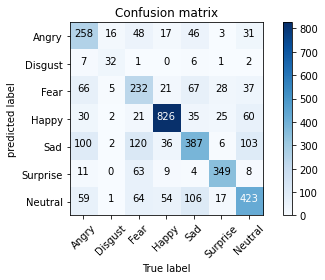

In [37]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_true = predy
y_pred = truey
cm = confusion_matrix(y_true, y_pred)
labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
title='Confusion matrix'
print(cm)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.ylabel('predicted label')
plt.xlabel('True label')
plt.tight_layout()
plt.show()

In [38]:
from tensorflow.keras import layers, models, datasets, Sequential

model1 = models.Model(inputs = model.inputs, outputs = model.layers[1].output)
model1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8_input (InputLayer)  [(None, 48, 48, 1)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 46, 46, 64)        36928     
Total params: 37,568
Trainable params: 37,568
Non-trainable params: 0
_________________________________________________________________


(48, 48, 1)


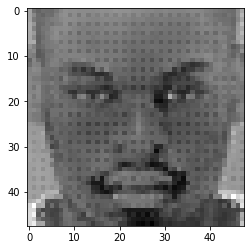

In [48]:
print(X_train[1].shape)
#visualization of feature map
plt.imshow(np.reshape(X_train[1], (48,48)),cmap='gray')
plt.show()

In [49]:
feature_maps1 = model1.predict(np.reshape(X_train[1], (1,48,48,1)))

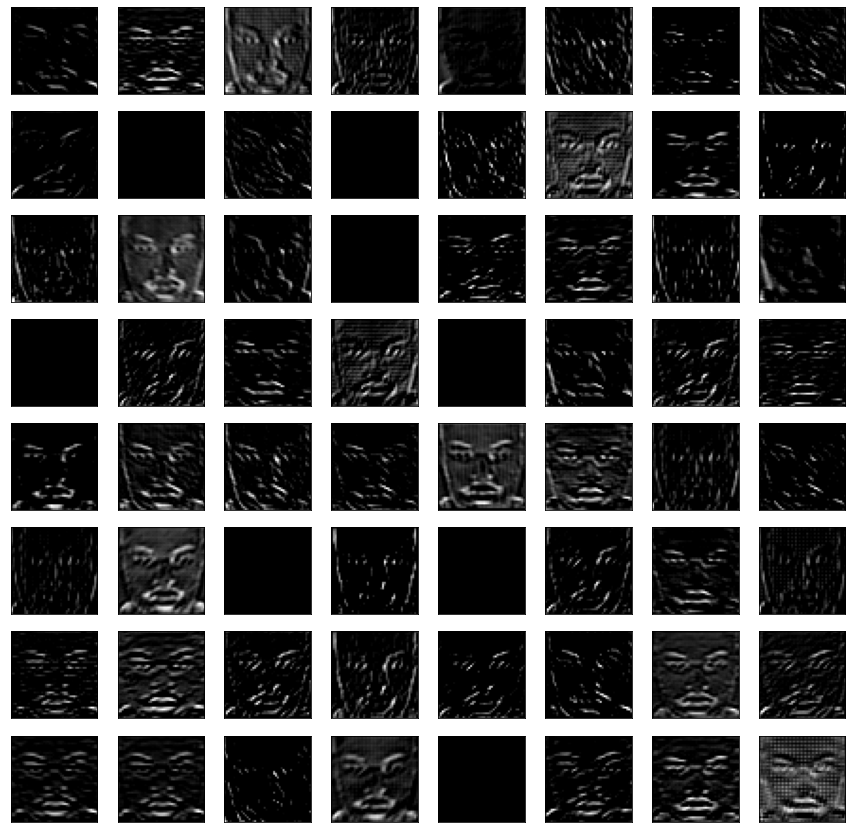

In [50]:
square = 8

#fliter number
ix = 1
plt.figure(figsize=(15,15))
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = plt.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(feature_maps1[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
plt.show()

In [ ]:
model2 = models.Model(inputs = model.inputs, outputs = model.layers[2].output)
model2.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10_input (InputLayer) [(None, 48, 48, 1)]       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 46, 46, 64)        36928     
_________________________________________________________________
batch_normalization_3 (Batch (None, 46, 46, 64)        256       
Total params: 37,824
Trainable params: 37,696
Non-trainable params: 128
_________________________________________________________________


In [ ]:
feature_maps2 = model2.predict(np.reshape(X_train[13], (1,48,48,1)))

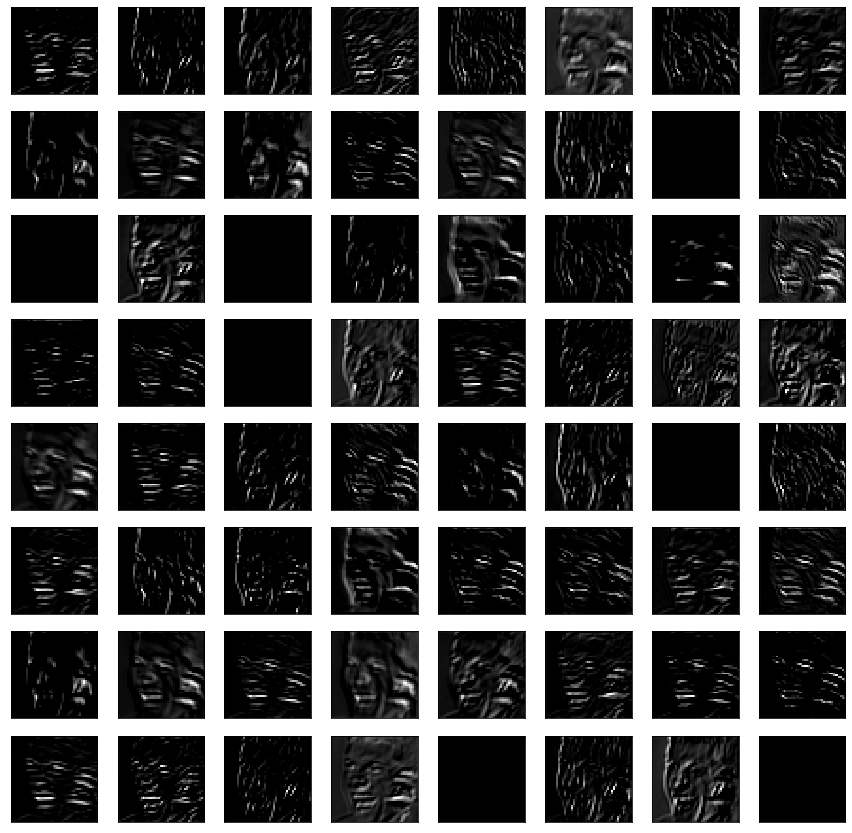

In [ ]:
square = 8

#fliter number
ix = 1
plt.figure(figsize=(15,15))
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = plt.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(feature_maps2[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
plt.show()